In [10]:
import numpy as np
import matplotlib.pyplot as plt
from seismic_interpretation_tools.Reflection import Zoeppritz_approximation as za

## <center> Aproximações das equações de Zoeppritz </center>

As equações de Zoeppritz são complicadas e não dão uma noção intuitiva de como as propriedades das rochas impactam na variação da amplitude com o offset (ou ângulo). Por essa razão, varios autores derivaram aproximações das equações para estimar a amplitude como uma função dos ângulos para casos em que os ângulos eram inferiores ao crítico.

### Aki e Richards (1980) e Wiggins et al. (1983) 

Uma popular aproximação da equação de Zoeppritz é uma relação que contempla três termos ($A$, $B$ e $C$):

### $$R(\theta) = A + B\sin{\theta}^2 + C\sin^2{\theta} \tan^2{\theta}$$


Onde:

$A$ - é o coeficiente de reflexão no ângulo zero relacionado ao contraste de impedância acústica (Intercept);

$B$ - Introduz o efeito da velocidade cisalhante nos ângulos diferentes de zero (Gradiente – Slope); e

$C$ - Determina a curvatura da resposta de amplitude perto do ângulo crítico.

Parâmetros:

### $$ V_p = \frac{V_{p1}+V_{p2}}{2} \;\;\;\;\;\;\;\;\; V_s = \frac{V_{s1}+V_{s2}}{2} $$

### $$\rho = \frac{\rho_{1}+\rho_{2}}{2}$$

### $$ \left( \frac{V_s}{V_p} \right)^2 = \frac{\left(\frac{V_{s1}}{V_{p1}}\right)^2 + \left(\frac{V_{s2}}{V_{p2}}\right)^2}{2} $$

### $$ \Delta V_p = V_{p2} - V_{p1} \;\;\;\;\;\;\;\;\; \Delta V_s = V_{s2} - V_{s1} $$

### $$ \Delta \rho = \rho_2 - \rho_1 $$


###  Hilterman (2001)

### $$R(\theta) = \frac{AI_2 - AI_1}{AI_2+AI_1}\cos^2{\theta} + \frac{\sigma_2-\sigma_1}{(1-\sigma_{avg})^2}\sin^2{\theta}$$

$AI$ - Impedância acústica; e

$\sigma$ - razão de poisson

### Implementando o exemplo do livro Seismic Amplitude (Rob \& Simm, 2014)

In [23]:
#Definindo Parâmetros testes
vp_1, vp_2 = 2438, 2600 #m/s
vs_1, vs_2 = 1006, 1700
rho_1, rho_2 = 2.25, 1.85
theta = np.linspace(0,80,161)

In [24]:
analise = za.Zoeppritz_approximation(np.deg2rad(theta),vp_1,vp_2,vs_1,vs_2,rho_1,rho_2)

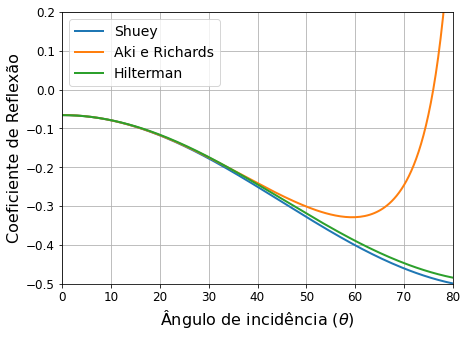

In [27]:
plt.figure(figsize=(7,5))
plt.plot(theta,analise.shuey(),lw=2,label='Shuey')
plt.plot(theta,analise.aki_and_richards(),lw=2,label='Aki e Richards')
plt.plot(theta,analise.hilterman(),lw=2,label='Hilterman')


plt.grid()

plt.xlim(0,80)
plt.ylim(-0.5,0.2)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.ylabel('Coeficiente de Reflexão',fontsize=16)
plt.xlabel(r'Ângulo de incidência ($\theta$)',fontsize=16)

plt.legend(fontsize=14)

------------

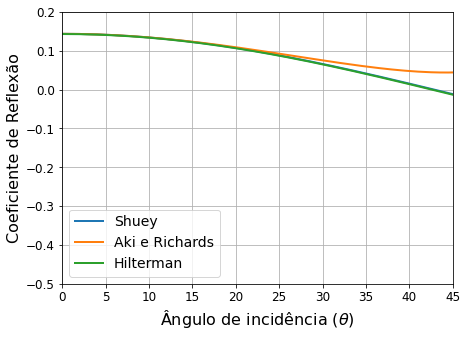

In [33]:
#Definindo Parâmetros testes
vp_1, vp_2 = 2238, 2800 #m/s
vs_1, vs_2 = 1006, 1500
rho_1, rho_2 = 2.25, 2.4
theta = np.linspace(0,80,161)

analise = za.Zoeppritz_approximation(np.deg2rad(theta),vp_1,vp_2,vs_1,vs_2,rho_1,rho_2)

plt.figure(figsize=(7,5))
plt.plot(theta,analise.shuey(),lw=2,label='Shuey')
plt.plot(theta,analise.aki_and_richards(),lw=2,label='Aki e Richards')
plt.plot(theta,analise.hilterman(),lw=2,label='Hilterman')


plt.grid()

plt.xlim(0,45)
plt.ylim(-0.5,0.2)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.ylabel('Coeficiente de Reflexão',fontsize=16)
plt.xlabel(r'Ângulo de incidência ($\theta$)',fontsize=16)

plt.legend(fontsize=14)